<a href="https://colab.research.google.com/github/R786P/data-science-roadmap-2025_2026/blob/main/11_model_evaluation/01_metrics_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pygit2==1.15.1
%cd /content
!git clone https://github.com/lllyasviel/Fooocus.git
%cd /content/Fooocus
!python entry_with_update.py --share --always-high-vram

📈 Model Evaluation Metrics
------------------------------
Accuracy    : 0.771
Precision   : 0.588
Recall      : 0.458
F1-Score    : 0.515
ROC-AUC     : 0.790


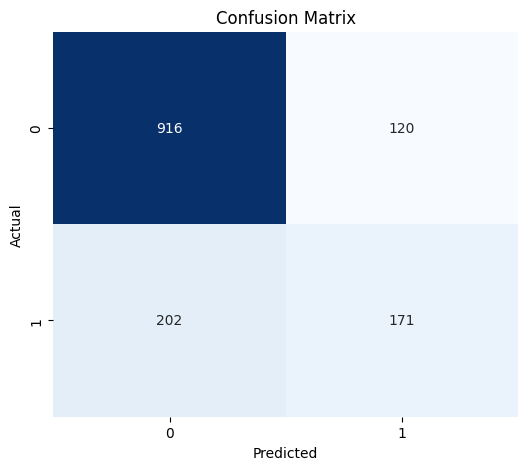

In [10]:

# 11_model_evaluation/01_metrics_comparison.ipynb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv")

# ✅ FIX: Handle TotalCharges
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(0)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Prep
X = df[['tenure', 'MonthlyCharges', 'TotalCharges']]
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=50, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Calculate metrics
metrics = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "F1-Score": f1_score(y_test, y_pred),
    "ROC-AUC": roc_auc_score(y_test, y_proba)
}

print("📈 Model Evaluation Metrics")
print("-" * 30)
for name, value in metrics.items():
    print(f"{name:<12}: {value:.3f}")

# Confusion Matrix
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()